Importação das bibliotecas necessárias para realizara a análise do projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carregando o arquivo csv

In [ ]:
df = pd.read_csv(
    'Ano-2025.csv',
    sep=';',
    encoding='utf-8'
)

C:\Users\claud\AppData\Local\Temp\ipykernel_15788\3846288734.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Verificando as colunas e realizando o tratamento de dados e seleção de colunas para realizar a análise

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201892 entries, 0 to 201891
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          201892 non-null  object 
 1   cpf                        200977 non-null  float64
 2   ideCadastro                200977 non-null  float64
 3   nuCarteiraParlamentar      200977 non-null  float64
 4   nuLegislatura              201892 non-null  int64  
 5   sgUF                       200977 non-null  object 
 6   sgPartido                  200977 non-null  object 
 7   codLegislatura             201892 non-null  int64  
 8   numSubCota                 201892 non-null  int64  
 9   txtDescricao               201892 non-null  object 
 10  numEspecificacaoSubCota    201892 non-null  int64  
 11  txtDescricaoEspecificacao  70124 non-null   object 
 12  txtFornecedor              201892 non-null  object 
 13  txtCNPJCPF                 16

In [ ]:
colunas_selecionadas = [
    'txNomeParlamentar',
    'sgUF',
    'sgPartido',
    'txtDescricao',
    'txtDescricaoEspecificacao',
    'txtFornecedor',
    'datEmissao',
    'vlrDocumento'
]

df_selection = df[colunas_selecionadas].copy()

In [5]:
df_selection = df_selection.rename(columns={
    'txNomeParlamentar': 'Nome_Parlamentar',
    'sgUF': 'UF',
    'sgPartido': 'Partido',
    'txtDescricao': 'Descricao',
    'txtDescricaoEspecificacao': 'Descricao_Espefica',
    'txtFornecedor': 'Fornecedor',
    'datEmissao': 'Data Emissao',
    'vlrDocumento': 'Valor'
})

In [6]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201892 entries, 0 to 201891
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Nome_Parlamentar    201892 non-null  object 
 1   UF                  200977 non-null  object 
 2   Partido             200977 non-null  object 
 3   Descricao           201892 non-null  object 
 4   Descricao_Espefica  70124 non-null   object 
 5   Fornecedor          201892 non-null  object 
 6   Data Emissao        194273 non-null  object 
 7   Valor               201892 non-null  float64
dtypes: float64(1), object(7)
memory usage: 12.3+ MB


In [ ]:
df_selection['Data Emissao'] = pd.to_datetime(df_selection['Data Emissao'])

In [8]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201892 entries, 0 to 201891
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Nome_Parlamentar    201892 non-null  object        
 1   UF                  200977 non-null  object        
 2   Partido             200977 non-null  object        
 3   Descricao           201892 non-null  object        
 4   Descricao_Espefica  70124 non-null   object        
 5   Fornecedor          201892 non-null  object        
 6   Data Emissao        194273 non-null  datetime64[ns]
 7   Valor               201892 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 12.3+ MB


In [9]:
df_selection.head()

,Nome_Parlamentar,UF,Partido,Descricao,Descricao_Espefica,Fornecedor,Data Emissao,Valor
0,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2025-02-07,1467.0
1,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2025-03-11,1467.0
2,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2025-04-11,1467.0
3,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2025-05-12,1467.0
4,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2025-06-03,1467.0


In [10]:
df_selection.tail()

,Nome_Parlamentar,UF,Partido,Descricao,Descricao_Espefica,Fornecedor,Data Emissao,Valor
201887,Elmano Férrer,PI,PP,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ELBA ESPIRITO SANTO SARDINHA FERREIRA ME,2025-12-16,70.47
201888,Elmano Férrer,PI,PP,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,SERVICO NACIONAL DE APREND. COMERCIAL,2025-11-05,97.00
201889,Elmano Férrer,PI,PP,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,NaN,LELEKA PRODUÇOES E LOCAÇOES EIRELI,2025-11-25,12700.00
201890,Elmano Férrer,PI,PP,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,NaN,NOVACAR LOCADORA DE VEICULOS LTDA,2025-11-10,5500.00
201891,Elmano Férrer,PI,PP,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,NaN,NOVACAR LOCADORA DE VEICULOS LTDA,2025-12-12,5500.00


In [ ]:
df_selection['Valor'] = df_selection['Valor'].clip(lower=0)

In [ ]:
df_selection['Descricao'].nunique()

19

In [ ]:
df_selection['Descricao'].value_counts()

Descricao
COMBUSTÍVEIS E LUBRIFICANTES.                                70124
PASSAGEM AÉREA - SIGEPA                                      36369
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                    19354
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    19281
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         17173
TELEFONIA                                                    12626
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                    9631
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.        7934
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                 6765
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                    824
PASSAGEM AÉREA - RPA                                           475
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.       467
PASSAGEM AÉREA - REEMBOLSO                                     313
ASSINATURA DE PUBLICAÇÕES                                      245
SERVIÇOS POSTAIS                                    

Criando a tabela com as seguintes colunas "Frequência", "Frequência relativa", "Valor R$ total por categoria", "média", "Médiana", "Desvio Padrão"

In [ ]:
contagem_categoria = (
    df_selection['Descricao']
        .value_counts()
        .reset_index()
)

contagem_categoria.columns = ['descricao', 'frequencia']
contagem_categoria

,descricao,frequencia
0,COMBUSTÍVEIS E LUBRIFICANTES.,70124
1,PASSAGEM AÉREA - SIGEPA,36369
2,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",19354
3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,19281
4,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,17173
5,TELEFONIA,12626
6,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,9631
7,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",7934
8,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,6765
9,"PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",824


In [ ]:
contagem_categoria['percentual'] = (
    contagem_categoria['frequencia'] / contagem_categoria['frequencia'].sum()
) * 100.

contagem_categoria.round(2)

,descricao,frequencia,percentual
0,COMBUSTÍVEIS E LUBRIFICANTES.,70124,34.73
1,PASSAGEM AÉREA - SIGEPA,36369,18.01
2,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",19354,9.59
3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,19281,9.55
4,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,17173,8.51
5,TELEFONIA,12626,6.25
6,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,9631,4.77
7,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",7934,3.93
8,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,6765,3.35
9,"PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",824,0.41


In [ ]:
total_por_categoria = (
    df_selection
        .groupby('Descricao')['Valor']
        .sum()
        .reset_index()
)

total_por_categoria

,Descricao,Valor
0,AQUISIÇÃO DE TOKENS E CERTIFICADOS DIGITAIS,3373.88
1,ASSINATURA DE PUBLICAÇÕES,76737.26
2,COMBUSTÍVEIS E LUBRIFICANTES.,22094644.21
3,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,93953977.36
4,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,1372779.45
5,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",3794492.44
6,LOCAÇÃO OU FRETAMENTO DE AERONAVES,1982045.00
7,LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES,230868.00
8,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,40129495.90
9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,32093765.99


In [ ]:
contagem_categoria = contagem_categoria.merge(
    total_por_categoria,
    left_on='descricao',
    right_on='Descricao',
    how='left'
)

In [ ]:

contagem_categoria = contagem_categoria.rename(columns={'Valor': 'total gasto'})

In [19]:
contagem_categoria = contagem_categoria.drop(columns='Descricao')

In [ ]:
contagem_categoria.head()

,descricao,frequencia,percentual,total gasto
0,COMBUSTÍVEIS E LUBRIFICANTES.,70124,34.733422,22094644.21
1,PASSAGEM AÉREA - SIGEPA,36369,18.014087,35091302.39
2,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",19354,9.586313,1127631.98
3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,19281,9.550156,32093765.99
4,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,17173,8.506033,93953977.36


In [ ]:
contagem_categoria['média'] = (
    contagem_categoria['total gasto'] / contagem_categoria['frequencia']
)

In [ ]:
mediana_por_categoria = (
    df_selection
        .groupby('Descricao')['Valor']
        .median()
        .reset_index()
)

mediana_por_categoria

,Descricao,Valor
0,AQUISIÇÃO DE TOKENS E CERTIFICADOS DIGITAIS,170.000
1,ASSINATURA DE PUBLICAÇÕES,113.150
2,COMBUSTÍVEIS E LUBRIFICANTES.,232.295
3,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,3000.000
4,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,65.000
5,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",300.000
6,LOCAÇÃO OU FRETAMENTO DE AERONAVES,20000.000
7,LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES,6000.000
8,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,5290.000
9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,613.420


In [ ]:
contagem_categoria = contagem_categoria.merge(
    mediana_por_categoria,
    left_on='descricao',
    right_on='Descricao',
    how='left'
)

In [ ]:
contagem_categoria = contagem_categoria.drop(columns='Descricao')
contagem_categoria = contagem_categoria.rename(columns={'Valor': 'mediana'})

In [25]:
contagem_categoria

,descricao,frequencia,percentual,total gasto,média,mediana
0,COMBUSTÍVEIS E LUBRIFICANTES.,70124,34.733422,22094644.21,315.079633,232.295
1,PASSAGEM AÉREA - SIGEPA,36369,18.014087,35091302.39,964.868498,877.570
2,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",19354,9.586313,1127631.98,58.263510,22.890
3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,19281,9.550156,32093765.99,1664.528084,613.420
4,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,17173,8.506033,93953977.36,5471.028787,3000.000
5,TELEFONIA,12626,6.253839,2890396.23,228.924143,119.840
6,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,9631,4.770372,1372779.45,142.537582,65.000
7,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",7934,3.929824,3794492.44,478.257177,300.000
8,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,6765,3.350801,40129495.90,5931.928441,5290.000
9,"PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",824,0.408139,152518.01,185.094672,156.100


In [ ]:
desvio_padrao_categoria = (
    df_selection
        .groupby('Descricao')['Valor']
        .std()
        .reset_index()
)

In [ ]:
desvio_padrao_categoria = desvio_padrao_categoria.rename(
    columns={'Valor': 'desvio padrão'}
)

In [ ]:
contagem_categoria = contagem_categoria.merge(
    desvio_padrao_categoria,
    left_on='descricao',
    right_on='Descricao',
    how='left'
)

In [29]:
contagem_categoria = contagem_categoria.drop(columns='Descricao')

In [30]:
contagem_categoria

,descricao,frequencia,percentual,total gasto,média,mediana,desvio padrão
0,COMBUSTÍVEIS E LUBRIFICANTES.,70124,34.733422,22094644.21,315.079633,232.295,607.413515
1,PASSAGEM AÉREA - SIGEPA,36369,18.014087,35091302.39,964.868498,877.570,856.080891
2,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",19354,9.586313,1127631.98,58.263510,22.890,152.432460
3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,19281,9.550156,32093765.99,1664.528084,613.420,2510.188688
4,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,17173,8.506033,93953977.36,5471.028787,3000.000,7010.227974
5,TELEFONIA,12626,6.253839,2890396.23,228.924143,119.840,322.360219
6,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,9631,4.770372,1372779.45,142.537582,65.000,540.352558
7,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",7934,3.929824,3794492.44,478.257177,300.000,652.740448
8,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,6765,3.350801,40129495.90,5931.928441,5290.000,3321.362051
9,"PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",824,0.408139,152518.01,185.094672,156.100,123.372011


In [ ]:
categorias_filtro = [
    'COMBUSTÍVEIS E LUBRIFICANTES.',
    'PASSAGEM AÉREA - SIGEPA',
    'SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO',
    'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR',
    'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.',
    'TELEFONIA'
]

In [32]:
df_plot = contagem_categoria[
    contagem_categoria['descricao'].isin(categorias_filtro)
].sort_values('média')


Visualização Gráfica comparando média e mediana das 5 categórias com a maior frequência 

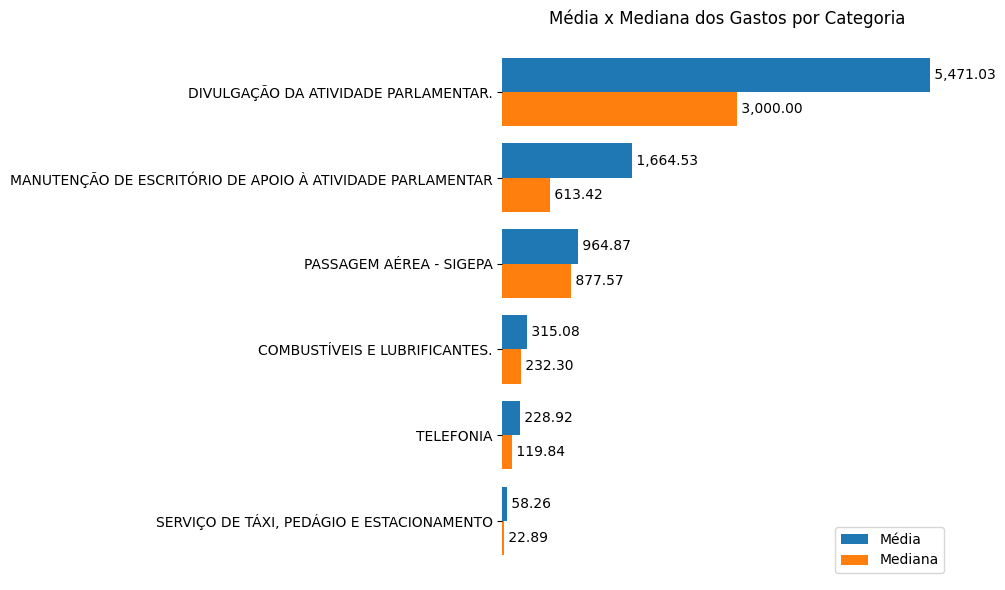

In [33]:

y = np.arange(len(df_plot))
altura_barra = 0.4

plt.figure(figsize=(10, 6))

# Média
plt.barh(
    y + altura_barra/2,
    df_plot['média'],
    height=altura_barra,
    label='Média'
)

# Mediana
plt.barh(
    y - altura_barra/2,
    df_plot['mediana'],
    height=altura_barra,
    label='Mediana'
)

# Labels das categorias
plt.yticks(y, df_plot['descricao'])

# Título e eixo X
plt.xlabel('')
plt.title('Média x Mediana dos Gastos por Categoria')
plt.xticks([])

# Remover bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionar valores a barras
for i, v in enumerate(df_plot['média']):
    plt.text(v, i + altura_barra/2, f' {v:,.2f}', va='center')

for i, v in enumerate(df_plot['mediana']):
    plt.text(v, i - altura_barra/2, f' {v:,.2f}', va='center')

# Legenda
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [56]:
filtro_categoria_Atv_parlamentar = df_selection[
    df_selection['Descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'
]['Valor']

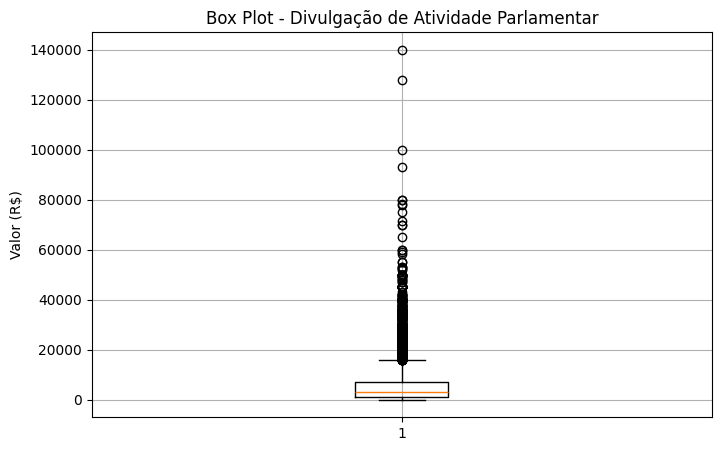

In [57]:
plt.figure(figsize=(8, 5))
plt.boxplot(filtro_categoria_Atv_parlamentar)

plt.title('Box Plot - Divulgação de Atividade Parlamentar')
plt.ylabel('Valor (R$)')
plt.grid(True)

plt.show()


In [58]:
filtro_categoria_Man_atv_parl = df_selection[
    df_selection['Descricao'] == 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR'
]['Valor']

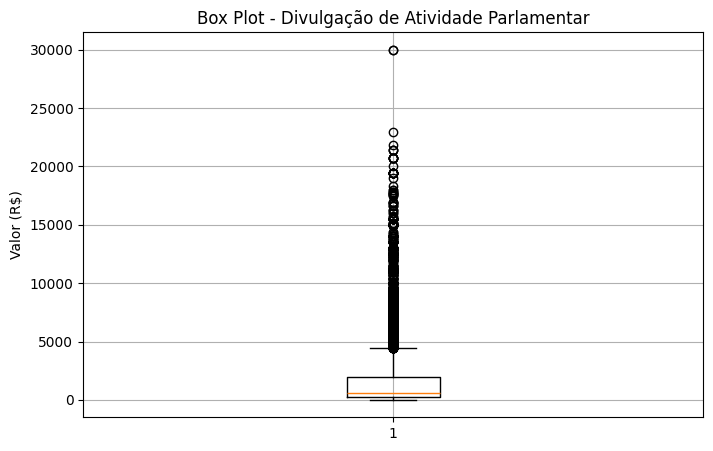

In [59]:
plt.figure(figsize=(8, 5))
plt.boxplot(filtro_categoria_Man_atv_parl)

plt.title('Box Plot - Divulgação de Atividade Parlamentar')
plt.ylabel('Valor (R$)')
plt.grid(True)

plt.show()

In [64]:
filtro_categoria_Telefon = df_selection[
    df_selection['Descricao'] == 'TELEFONIA'
]['Valor']

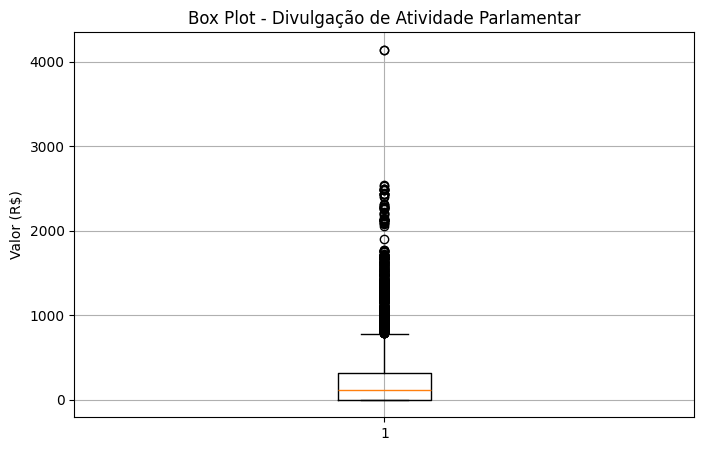

In [65]:
plt.figure(figsize=(8, 5))
plt.boxplot(filtro_categoria_Telefon)

plt.title('Box Plot - Divulgação de Atividade Parlamentar')
plt.ylabel('Valor (R$)')
plt.grid(True)

plt.show()